<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/01.00.Aula-Explorando-dados-da-covid-19.slides.html"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- Página Inicial](00.00-Pagina_Inicial.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Qualidade e comparação de modelos ->](05.00.Aula-Qualidade_e_comparacao_de_modelos.ipynb)

---


# Explorando a base de dados da Covid-19

Começamos a explorar, aqui, a base de dados [Coronavirus 2019-nCoV](https://www.kaggle.com/gpreda/coronavirus-2019ncov). Só um pontapé inicial. Vamos carregar as bases de dados e montar alguns gráficos. Neste processo, veremos a biblioteca [pandas](https://pandas.pydata.org/) para o tratamento dos dados e as ferramentas gráficas [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html), [seaborn](https://seaborn.pydata.org/), e [plotly.express](https://plotly.com/python/plotly-express/).

Objetivos de aprendizado:

1. Ambiente kaggle.

1. Carregando dados no kaggle.

1. Trabalhando com pandas.

1. Gráficos com matplotlib.pyplot, pandas e plotly.

1. Crescimento exponencial.

1. Regressão linear e mínimos quadrados


## Usando o kaggle

*Kernel* é um nome genérico que pode significar um *notebook*, como no [Jupyter](https://jupyter.org/), ou um *script*. Ambos podem ser em [python](https://www.python.org/) ou em [R](https://www.r-project.org/).

Aqui, vamos usar apenas *kernels* de *notebooks* em python.

### Criando um *kernel*

Após criar uma conta no <https://www.kaggle.com/>, você pode criar um novo *kernel* de um *notebook* em python de duas maneiras:

1. Clicar no ícone `<>`, na lateral esquerda, para acessar a página de *notebooks* e clicar no botão `+ New Notebook` no canto superior direito da página, para criar um novo notebook seu. Em seguida, selecionar o tipo de *kernel*. No caso, selecionar o tipo *notebook* e a linguagem *python*.

2. Abrir um dos diversos *kernels* disponíveis no *kaggle* e clicar no botão `Copy and Edit` no canto superior direito da página, para criar uma cópia desse *kernel* na sua conta.

Você pode acessar os seus *kernels* clicando no ícone `<>` e na aba `Your Work`.

### Gravando o *kernel*

Durante a edição do *kernel*, você pode fazer `commits` regulares, para salvar cada versão do *kernel*, à medida que você vai escrevendo mais.

Entre cada `commit`, você também tem a opção de deixar o kaggle salvar constantemente o rascunho. Isso pode, ou não, estar habilitado por default. Recomendo conferir e habilitar. Isso é feito abrindo a barra lateral direita (clicar na seta ao lado do botão `Commit`), se ela não estiver aberta, clicar em Settings e selecionar a opção `On` em `Internet`.

Infelizmente, não encontrei uma opção de "salvar" o *kernel* manualmente, mas, felizmente, com a opção internet habilitada, isso é feito com extrema frequência.

De qualquer forma, quando for dar uma pausa no trabalho, vale clicar na seta no canto superior esquerdo, para sair da edição (ou ameaçar sair), que o kaggle vai avisar se a última edição foi gravada ou não.

### Funcionamento do *kernel*

Cada *kernel* funciona (quase) como um caderno [Jupyter](https://jupyter.org/). Uma diferença é que não é permitindo importar dados diretamente da internet, e.g. o seguinte comando não funciona no kaggle, mas funciona localmente ou em outras plataformas de computação em nuvem.

```python
pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
```

Veremos como resolver isso em seguida.

### Origem e atualização dos dados

Os dados são carregados a partir de links montados no seu diretório de dados.

Esses links são criados de duas maneiras:

1. Ao criar um *kernel* a partir de outro *kernel*, os arquivos/links deste são automaticamente transferidos como links para o seu ambiente, no diretório `../input/` ou `/kernel/input/`.

1. Durante a edição do seu *kernel*, clicar em `File` na barra de menu superior e, em seguida, em `Add or upload data`.

No caso deste *kernel*, os dados do covid-19 vêm do *kernel* [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset), que possui links para extrair os dados do repósitorio externo [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19).

Os dados populacionais vêm do *kernel* [Population Dataset Country-Wise](https://www.kaggle.com/akshitbatra/population-dataset-countrywise/), que possui um link para extrair esses dados da base disponibilizada em [Worldometer: Countries in the world by population (2020)](https://www.worldometers.info/world-population/population-by-country/).

Os links para dados externos são atualizados a cada *commit* do seu *kernel*.

Como dito acima, o kaggle não permite a extração direta de dados externos em células do *kernel*. Isso evita que os dados sejam constantemente carregados sempre que a célula é executada. Isso seria um desperdício de banda de tráfego de internet. Principalmente quando lembramos que muitos desses dados podem estar sendo usados por centenas de pessoas ao mesmo tempo (e.g. centenas de usuários trabalhando em uma mesma competição do *kaggle*, em cima dos mesmos dados).

Dessa forma, os dados externos são atualizados uma vez por dia pelo *kaggle*, armazenados em seus servidores e disponibilizados para os seus usuários diretamente como arquivos.

Isso reduz drasticamente o tráfego de dados na internet, acelera a execução de cada *kernel* e mantém os dados diariamente atualizados.

## Importando as bibliotecas

Primeiro, importamos todas as bibliotecas usadas neste *kernel*.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os # system tools

import datetime as dt # date and time tools

import numpy as np # numerical package
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # graphics library
import seaborn as sns # fancy graphics library
import plotly.express as px # interactive graphics library

In [2]:
dt_string = dt.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 12/Apr/2020


## Carregando os dados

### Arquivos de dados do Covid-19

Criamos este *kernel* a partir do *kernel* [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset), clicando no botão **New Notebook**. Dessa forma, este *kernel* foi automaticamente criado com os dados daquele *kernel* acessíveis no diretório `/kaggle/input/` (ou `../input`).

### Arquivo de dados populacionais

Também adicionamos a base de dados do *kernel* [Population Dataset Country-Wise](https://www.kaggle.com/akshitbatra/population-dataset-countrywise/). Para adicionar essa base de dados, é necessário clicar em `File` na barra de menu, selecionar `Add or upload data`, digitar "Population Dataset Country-Wise" no campo de buscas e em seguida clicar nesta base quando ela aparecer na lista de resultados da busca. Após isso, um link para essa base de dados é automaticamente criado no diretório `/kaggle/input/` deste *kernel*.

### Visualizando o diretório dos arquivos disponíveis

Podemos ver todos esses arquivos do diretório `/kaggle/input` com o script a seguir.

In [5]:
# Input data files are available in the "../input/" directory (or "/kaggle/input/").
# Running this (by clicking run or pressing Shift+Enter) will list all files under the input directory:

#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

### Carregando os arquivos

Carregamos os dados como *DataFrames* do [pandas](https://pandas.pydata.org/), usando a função [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

Utilizamos, também, o método [rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html), dos *DataFrames*, para renomear as colunas dessas tabelas. A opção `inplace=True` faz com que o próprio *DataFrame* seja modificado, caso contrário ele não é modificado, apenas retorna um outro *DataFrame* modificado que pode ser associado a uma nova variável.

In [3]:
def get_url_jh(filename):
    """
    Retorna o endereço URL do arquivo 'filename' no repositório da John Hopkins University no github
    """
    return 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/' + filename

In [4]:
df = pd.read_csv(get_url_jh('time_series_covid19_confirmed_global.csv'))
#df = pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [5]:
df_confirmed = pd.read_csv(get_url_jh('time_series_covid19_confirmed_global.csv'))
df_recovered = pd.read_csv(get_url_jh('time_series_covid19_recovered_global.csv'))
df_deaths = pd.read_csv(get_url_jh('time_series_covid19_deaths_global.csv'))

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

O banco de dados da população do países inclui dados de vários anos e, por algum motivo, estão duplicados. Pegamos apenas o ano 2020 e descartamos as duplicatas.

In [7]:
df_pop = pd.read_csv("../input/population-dataset-countrywise/population_dataset.csv")
df_pop_2020 = df_pop[df_pop['year'] == '2020'].drop('year', axis=1).drop_duplicates(subset='country_name', keep='first')
df_pop_2020.rename(columns={'country_name':'Country', 'population':'Population'}, inplace=True)


### Visualizando o conteúdo dos arquivos

Visualizamos o início ou o final de cada arquivo de dados da seguinte forma:

In [8]:
df_confirmed.head()

Province/State      Country      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.0000  65.0000        0        0        0   
1            NaN      Albania  41.1533  20.1683        0        0        0   
2            NaN      Algeria  28.0339   1.6596        0        0        0   
3            NaN      Andorra  42.5063   1.5218        0        0        0   
4            NaN       Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  \
0        0        0        0  ...     273     281     299     349     367   
1        0        0        0  ...     277     304     333     361     377   
2        0        0        0  ...     986    1171    1251    1320    1423   
3        0        0        0  ...     428     439     466     501     525   
4        0        0        0  ...       8       8      10      14      16   

   4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  
0     423     444     484      521      555  
1     383     400     409      416      433  
2    1468    1572    1666     1761     1825  
3     545     564     583      601      601  
4      17      19      19       19       19  

[5 rows x 85 columns]

In [9]:
df_recovered.head()

Province/State      Country      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.0000  65.0000        0        0        0   
1            NaN      Albania  41.1533  20.1683        0        0        0   
2            NaN      Algeria  28.0339   1.6596        0        0        0   
3            NaN      Andorra  42.5063   1.5218        0        0        0   
4            NaN       Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  \
0        0        0        0  ...      10      10      10      15      18   
1        0        0        0  ...      76      89      99     104     116   
2        0        0        0  ...      61      62      90      90      90   
3        0        0        0  ...      10      16      21      26      31   
4        0        0        0  ...       1       1       2       2       2   

   4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  
0      18      29      32       32       32  
1     131     154     165      182      197  
2     113     237     347      405      460  
3      39      52      58       71       71  
4       2       2       2        2        4  

[5 rows x 85 columns]

In [10]:
df_deaths.tail()

Province/State                Country        Lat       Long  \
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  \
259        0        0        0        0        0        0  ...       0   
260        0        0        0        0        0        0  ...       0   
261        0        0        0        0        0        0  ...       0   
262        0        0        0        0        0        0  ...       0   
263        0        0        0        0        0        0  ...       0   

     4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  
259       0       0       0       0       0       0       0        0        0  
260       0       0       0       0       0       0       0        0        0  
261       0       0       0       0       0       0       0        0        0  
262       0       0       0       0       0       0       0        0        0  
263       0       0       0       0       0       0       0        0        0  

[5 rows x 85 columns]

In [11]:
df_pop_2020

Country     Population
0             China  1,439,323,776
18           Turkey     84,339,067
36         DR Congo     89,561,403
54          Vietnam     97,338,579
72             Iran     83,992,949
...             ...            ...
4105         Brazil    212,559,417
4123       Pakistan    220,892,340
4127      Indonesia    273,523,615
4159  United States    331,002,651
4177          India  1,380,004,385

[200 rows x 2 columns]

### Objetos do pandas

Cada objeto acima é do tipo `DataFrame`, cada coluna ou linha é do tipo `Series` e os elementos podem ser de diversos tipos.

In [12]:
print(type(df_confirmed))
print(type(df_confirmed['Country']))
print(type(df_confirmed.iloc[0]))
print(type(df_confirmed.iloc[0,0]))
print(type(df_confirmed.iloc[0,1]))
print(type(df_confirmed.iloc[0,2]))
print(type(df_confirmed.iloc[0,4]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'float'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>


## Dados do Brasil

Podemos extrair os dados do Brasil selecionando-os pela coluna do país. 

Vamos aproveitar e juntar os dados (confirmados, recuperados, decessos) do Brasil em um mesmo `DataFrame`, com uma coluna para cada tipo de caso. Descartamos, ainda, as primeiras colunas, para ficar apenas com os dados diários da epidemia.

### Selecionando a linha com os dados do Brasil

Em [pandas](https://pandas.pydata.org/), podemos selecionar uma (ou mais) linha(s) de acordo com alguma condição booleana. No caso, queremos que a coluna 'Country' seja igual a 'Brazil'. Isso é feito com a condição 

```python
df_confirmed['Country'] == 'Brazil'
```

que irá retornar um objeto `pandas.core.series.Series` com os valores `True` ou `False` em cada linha, dependendo do resultado do teste.

In [13]:
print(type(df_confirmed['Country'] == 'Brazil'))
print(df_confirmed['Country'] == 'Brazil')

<class 'pandas.core.series.Series'>
0      False
1      False
2      False
3      False
4      False
       ...  
259    False
260    False
261    False
262    False
263    False
Name: Country, Length: 264, dtype: bool


Utilizando essa condição na seleção das linhas, que é feita com o método `loc` do `DataFrame`, nos dá a linha desejada, que, no caso, é a de número 28:

In [14]:
df_confirmed.loc[df_confirmed['Country'] == 'Brazil']

Province/State Country     Lat     Long  1/22/20  1/23/20  1/24/20  \
28            NaN  Brazil -14.235 -51.9253        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  \
28        0        0        0  ...    8044    9056   10360   11130   12161   

    4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  
28   14034   16170   18092    19638    20727  

[1 rows x 85 columns]

Observe que as primeiras colunas contém informações do país. Apenas a partir da quarta linha é que temos os dados da epidemia. Podemos selecionar isso pelo método `iloc[0,4:]`. O primeiro argumento `0` indica que é a linha `0` (e única) do `DataFrame` com a linha do Brasil.

O resultado é um objeto do tipo `Series`, já que selecionamos uma única linha.

In [15]:
print(type(df_confirmed.loc[df_confirmed['Country'] == 'Brazil'].iloc[0,4:]))
print(df_confirmed.loc[df_confirmed['Country'] == 'Brazil'].iloc[0,4:])

<class 'pandas.core.series.Series'>
1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/7/20     14034
4/8/20     16170
4/9/20     18092
4/10/20    19638
4/11/20    20727
Name: 28, Length: 81, dtype: object


### Juntando os dados do Brasil

Podemos fazer isso para cada tipo de caso e montar um `DataFrame` com todos os dados da epidemia no `Brazil`:

In [16]:
df_Brazil = pd.DataFrame({'Confirmed':df_confirmed.loc[df_confirmed['Country'] == 'Brazil'].iloc[0,4:], 
                          'Recovered':df_recovered.loc[df_confirmed['Country'] == 'Brazil'].iloc[0,4:],
                          'Deaths':df_deaths.loc[df_confirmed['Country'] == 'Brazil'].iloc[0,4:]
                         })
df_Brazil.tail()

Confirmed Recovered Deaths
4/7/20      14034        68    686
4/8/20      16170        79    819
4/9/20      18092       101    950
4/10/20     19638       129   1057
4/11/20     20727       139   1124

### Dados relativos

Se quisermos ver os dados relativos à população total, em porcentagem, podemos dividir os dados acima pela população total e multiplicar por 100.

Para acessarmos a população do Brasil em 2020 no *DataFrame* `df_pop_2020`, selecionamos a linha 'Brazil' da coluna 'Country':

In [17]:
df_pop_2020[df_pop_2020['Country'] == 'Brazil']

Country   Population
4105  Brazil  212,559,417

Para obtermos o valor da população, selecionamos 'Brazil' na coluna 'Population':

In [18]:
df_pop_2020[df_pop_2020['Country'] == 'Brazil']['Population']

4105    212,559,417
Name: Population, dtype: object

Mas este é um objeto do tipo `Series`:

In [19]:
print(type(df_pop_2020[df_pop_2020['Country'] == 'Brazil']['Population']))
print(df_pop_2020[df_pop_2020['Country'] == 'Brazil']['Population'])

<class 'pandas.core.series.Series'>
4105    212,559,417
Name: Population, dtype: object


Não podemos simplesmente dividir os dados do Covid-19 por um objeto desse tipo. Para isso, podemos ler o seu conteúdo a partir da sua posição no *DataFrame*:

In [20]:
df_pop_2020[df_pop_2020['Country'] == 'Brazil'].iloc[0,1]

'212,559,417'

Mas isso é uma *string*.

Não podemos convertê-la diretamente para um inteiro por conta das vírgulas. 

Primeiro devemos eliminar as vírgulas e em seguida transformar essa nova *string* em um inteiro:

In [21]:
int(df_pop_2020[df_pop_2020['Country'] == 'Brazil'].iloc[0,1].replace(',',''))

212559417

Agora podemos obter as porcentagens de casos 'confirmados', 'recuperado' e 'decessos'.

In [22]:
df_Brazil_rel = 100000*df_Brazil/int(df_pop_2020[df_pop_2020['Country'] == 'Brazil'].iloc[0,1].replace(',',''))
df_Brazil_rel

Confirmed  Recovered    Deaths
1/22/20         0          0         0
1/23/20         0          0         0
1/24/20         0          0         0
1/25/20         0          0         0
1/26/20         0          0         0
...           ...        ...       ...
4/7/20    6.60239  0.0319911  0.322733
4/8/20    7.60728  0.0371661  0.385304
4/9/20     8.5115  0.0475161  0.446934
4/10/20   9.23883  0.0606889  0.497273
4/11/20   9.75116  0.0653935  0.528793

[81 rows x 3 columns]

### Selecionando parte dos dados de acordo com um limiar

Como a epidemia que se iniciou na China demorou a chegar no Brasil, assim como em outros países, é interessante, visando análises estatísticas, restringir os dados ao início da epidemia. Podemos fazer isso através do método `ge(n)`, que retorna um novo *DataFrame*, com `True` ou `False`, dependendo do valor original ser maior ou igual do que o argumento `n`. Usamos isso como condição para obtermos os dados desejados. 

Como os números de casos `confirmados`, `recuperados` e de `decessos` não devem ser decrescentes, não deveríamos precisar nos preocupar em selecionar o primeiro índice em que o valor deles é maior ou igual a `n` e usar esse índice para selecionar todos os dados a partir desse índice. Basta selecionarmos todos as linhas em que esse valor é maior ou igual a `n`.

Assim, para selecionarmos apenas do dados de casos confirmados no Brasil a partir do momento em que o número desses casos chegou a dez, fazemos

```python
df_Brazil[df_Brazil['Confirmed'].gt(10)]
```

Mas pode haver erros nos dados, então o ideal seria descobrir o primeiro dia em que a condição ocorre e selecionarmos todos os índices desse em diante. Mas não vou me preocupar com isso neste momento.

Assim, temos

In [23]:
df_Brazil[df_Brazil['Confirmed'].gt(10)]

Confirmed Recovered Deaths
3/6/20         13         0      0
3/7/20         13         0      0
3/8/20         20         0      0
3/9/20         25         0      0
3/10/20        31         0      0
3/11/20        38         0      0
3/12/20        52         0      0
3/13/20       151         0      0
3/14/20       151         0      0
3/15/20       162         0      0
3/16/20       200         0      0
3/17/20       321         2      1
3/18/20       372         2      3
3/19/20       621         2      6
3/20/20       793         2     11
3/21/20      1021         2     15
3/22/20      1546         2     25
3/23/20      1924         2     34
3/24/20      2247         2     46
3/25/20      2554         2     59
3/26/20      2985         2     77
3/27/20      3417         5     92
3/28/20      3904         5    111
3/29/20      4256         8    136
3/30/20      4579        17    159
3/31/20      5717        17    201
4/1/20       6836        19    240
4/2/20       8044        20    324
4/3/20       9056        27    359
4/4/20      10360        30    445
4/5/20      11130        30    486
4/6/20      12161        47    564
4/7/20      14034        68    686
4/8/20      16170        79    819
4/9/20      18092       101    950
4/10/20     19638       129   1057
4/11/20     20727       139   1124

## Função para extrair os dados de cada país

Ao invés de repetirmos o procedimento acima para cada país que desejemos analisar, podemos facilitar a extração desses dados definindo uma função apropriada.

Mas devemos tomar cuidado. Alguns países aparecem diversas vezes no *DataFrame*, separados por *Province/State*. Por exemplo, vejamos o Canadá:

In [24]:
df_confirmed.loc[df_confirmed['Country'].str.contains("Canada")]

Province/State Country      Lat      Long  1/22/20  1/23/20  \
35                     Alberta  Canada  53.9333 -116.5765        0        0   
36            British Columbia  Canada  49.2827 -123.1207        0        0   
37              Grand Princess  Canada  37.6489 -122.6655        0        0   
38                    Manitoba  Canada  53.7609  -98.8139        0        0   
39               New Brunswick  Canada  46.5653  -66.4619        0        0   
40   Newfoundland and Labrador  Canada  53.1355  -57.6604        0        0   
41                 Nova Scotia  Canada  44.6820  -63.7443        0        0   
42                     Ontario  Canada  51.2538  -85.3232        0        0   
43        Prince Edward Island  Canada  46.5107  -63.4168        0        0   
44                      Quebec  Canada  52.9399  -73.5491        0        0   
45                Saskatchewan  Canada  52.9399 -106.4509        0        0   
231           Diamond Princess  Canada   0.0000    0.0000        0        0   
238                  Recovered  Canada   0.0000    0.0000        0        0   
245      Northwest Territories  Canada  64.8255 -124.8457        0        0   
246                      Yukon  Canada  64.2823 -135.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/2/20  4/3/20  4/4/20  4/5/20  \
35         0        0        0        0  ...     969     969    1075    1181   
36         0        0        0        0  ...    1121    1174    1203    1203   
37         0        0        0        0  ...      13      13      13      13   
38         0        0        0        0  ...     167     182     182     203   
39         0        0        0        0  ...      91      91      91      98   
40         0        0        0        0  ...     183     195     195     217   
41         0        0        0        0  ...     193     207     236     262   
42         0        0        1        1  ...    2793    3255    3630    4354   
43         0        0        0        0  ...      22      22      22      22   
44         0        0        0        0  ...    5518    6101    6101    7944   
45         0        0        0        0  ...     206     220     220     249   
231        0        0        0        0  ...       0       0       0       0   
238        0        0        0        0  ...       0       0       0       0   
245        0        0        0        0  ...       2       2       4       4   
246        0        0        0        0  ...       6       6       6       6   

     4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  
35     1250    1373    1373    1423     1451     1567  
36     1266    1266    1291    1336     1370     1445  
37       13      13      13      13       13       13  
38      203     217     217     221      230      243  
39      103     105     105     108      112      112  
40      226     228     228     232      239      241  
41      293     310     310     342      407      428  
42     4347    4726    5276    5759     6237     6648  
43       22      22      25      25       25       25  
44     8580    9340   10031   10912    11677    12292  
45      249     260     260     271      285      289  
231       0       0       0       0        0        0  
238       0       0       0       0        0        0  
245       5       5       5       5        5        5  
246       6       7       7       7        8        8  

[15 rows x 85 columns]

Nesse caso, para obtermos o resultado total, devemos somar as colunas. Neste processo, descartamos as quatro colunas iniciais, que não são de dados numéricos das ocorrências.

In [25]:
df_confirmed.loc[df_confirmed['Country'].str.contains("Canada")].sum().iloc[4:]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        1
           ...  
4/7/20     17872
4/8/20     19141
4/9/20     20654
4/10/20    22059
4/11/20    23316
Length: 81, dtype: object

Agora, sim, estamos aptos a definir a função.

Incluímos, nessa função, uma opção para selecionar o país; uma opção para retornar os dados absolutos (número de casos) ou relativos (porcentagens em relação à população total, ou em relação a outros números, digamos, a cada mil habitantes, etc.); e uma opção para selecionar os dados a partir do momento em que um determinado tipo de caso ultrapassar for maior ou igual a um determinado valor.

In [1]:
def get_country_data(country, percount = False, case = '', threshold = 0):
    """
    Retorna um *DataFrame* do pandas com os dados conjuntos de um mesmo país.
    
    Junta os dados dos três *DataFrames* de casos confirmados, recuperados e decessos 
    em um mesmo *DataFrame*.
    
    Opção para retornar dados absolutos ou relativos à população total, em relação a
    um número de `percount`, por exemplo `percount=`100` para porcentagem, ou 
    `percount=1000` para cada mil habitantes.
    
    Opção para descartar os dados em que a quantidades de casos do tipo `case` é
    menor do que o valor `threshold`.
    """

    data = pd.DataFrame({'Confirmed':df_confirmed.loc[df_confirmed['Country'].str.contains(country)].sum(0).iloc[4:], 
                         'Recovered':df_recovered.loc[df_recovered['Country'].str.contains(country)].sum(0).iloc[4:],
                         'Deaths':df_deaths.loc[df_deaths['Country'].str.contains(country)].sum(0).iloc[4:]
                        })
    if threshold and case in ('Confirmed', 'Recovered', 'Deaths'):
        data = data[data[case].ge(threshold)]

    if percount:
        data = percount*data/int(df_pop_2020[df_pop_2020['Country']==country].iloc[0,1].replace(',',''))

    return data

### Extraindo os dados da Itália

Com essa função, podemos facilmente extrair os últimos dados de países quaisquer.

Por exemplo, a seguir, os dados da **Itália** em números absolutos:

In [27]:
data = get_country_data('Italy')
data

Confirmed Recovered Deaths
1/22/20         0         0      0
1/23/20         0         0      0
1/24/20         0         0      0
1/25/20         0         0      0
1/26/20         0         0      0
...           ...       ...    ...
4/7/20     135586      6694  17127
4/8/20     139422      6776  17669
4/9/20     143626      6973  18279
4/10/20    147577      7117  18849
4/11/20    152271      7243  19468

[81 rows x 3 columns]

Em relação a cada mil habitantes:

In [28]:
get_country_data('Italy', 100000).tail()

Confirmed Recovered   Deaths
4/7/20    224.251   11.0714   28.327
4/8/20    230.595   11.2071  29.2234
4/9/20    237.548   11.5329  30.2323
4/10/20   244.083   11.7711   31.175
4/11/20   251.847   11.9795  32.1988

E a partir do momento em que o número de casos confirmados chega a 1000:

In [29]:
get_country_data('Italy', case='Confirmed', threshold=1000)

Confirmed Recovered Deaths
2/29/20      1128        27     29
3/1/20       1694        30     34
3/2/20       2036        30     52
3/3/20       2502        30     79
3/4/20       3089        41    107
3/5/20       3858        41    148
3/6/20       4636       135    197
3/7/20       5883       135    233
3/8/20       7375       118    366
3/9/20       9172       118    463
3/10/20     10149       247    631
3/11/20     12462       288    827
3/12/20     12462       333    827
3/13/20     17660       510   1266
3/14/20     21157       510   1441
3/15/20     24747       510   1809
3/16/20     27980      1137   2158
3/17/20     31506      1407   2503
3/18/20     35713      1540   2978
3/19/20     41035      1540   3405
3/20/20     47021      1540   4032
3/21/20     53578      1540   4825
3/22/20     59138      2909   5476
3/23/20     63927      2909   6077
3/24/20     69176      3507   6820
3/25/20     74386      3730   7503
3/26/20     80589      4144   8215
3/27/20     86498      4528   9134
3/28/20     92472      4811  10023
3/29/20     97689      5033  10779
3/30/20    101739      5228  11591
3/31/20    105792      5408  12428
4/1/20     110574      5567  13155
4/2/20     115242      5828  13915
4/3/20     119827      6021  14681
4/4/20     124632      6325  15362
4/5/20     128948      6463  15887
4/6/20     132547      6598  16523
4/7/20     135586      6694  17127
4/8/20     139422      6776  17669
4/9/20     143626      6973  18279
4/10/20    147577      7117  18849
4/11/20    152271      7243  19468

## Gráficos

Vamos, agora, exibir alguns gráficos a partir desses dados

### Gráficos de alguns países

Peguemos alguns países para ilustrar.


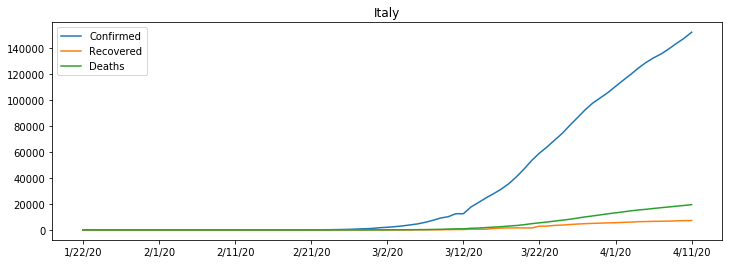

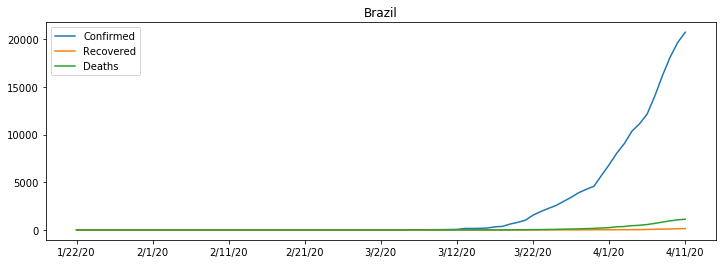

In [30]:
for country in ('Italy', 'Brazil'):
    get_country_data(country).plot(figsize=(12,4), title=country)
plt.show()

### Embelezando o gráfico

Só para embelezar um pouco o gráfico, podemos usar o estilo de gráfico do pacote `seaborn`. Escolhemos o estilo `darkgrid`:

In [31]:
sns.set_style("darkgrid")

A partir disso, montamos o gráfico como antes.

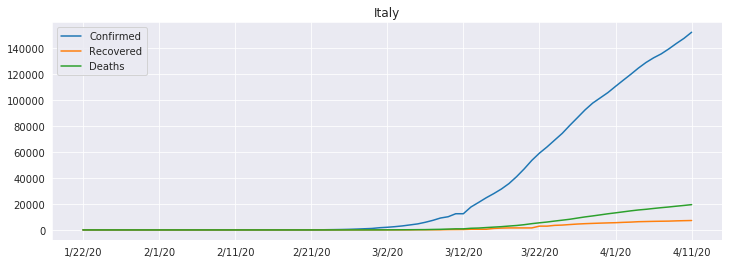

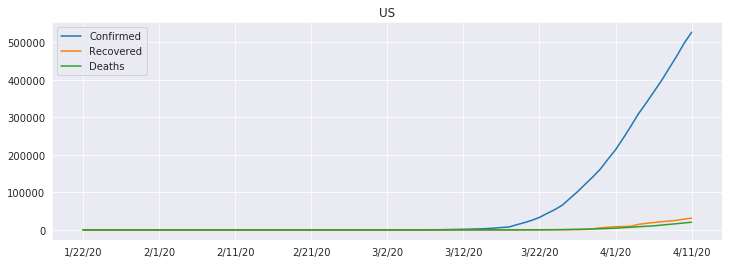

In [32]:
for country in ('Italy', 'US'):
    get_country_data(country).plot(figsize=(12,4), title=country)
plt.show()

### Gráficos interativos

Podemos construir gráficos interativos com diversos pacotes. Aqui usamos o pacote [plotly](https://plotly.com/python/), mais precisamente o módulo [plotly.express](https://plotly.com/python/plotly-express/). Com ele, podemos ampliar, reduzir ou selecionar uma parte do gráfico, visualiar os valores exatas passando o cursor em cima das linhas, etc.

Para traçar múltiplas linhas em um mesmo gráfico usando o plotly, é preciso alterar o *DataFrame* para ter apenas três colunas, uma para a abscissa, outra para identificar a linha e outra para a ordenada. No nosso caso, as linhas são tipos de casos ("confirmados", "recuperados" e "decessos"). Isso é obtido com o método [pandas.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

Vejamos o seu efeito no *DataFrame* dos dados do Brazil.

In [33]:
wide_df = get_country_data('Brazil')
tidy_df = pd.melt(wide_df.reset_index(), id_vars='index')
tidy_df.rename(columns={'index':'Data', 'variable': 'Situação', 'value': 'Número de casos'},
               inplace=True)
tidy_df

Data   Situação Número de casos
0    1/22/20  Confirmed               0
1    1/23/20  Confirmed               0
2    1/24/20  Confirmed               0
3    1/25/20  Confirmed               0
4    1/26/20  Confirmed               0
..       ...        ...             ...
238   4/7/20     Deaths             686
239   4/8/20     Deaths             819
240   4/9/20     Deaths             950
241  4/10/20     Deaths            1057
242  4/11/20     Deaths            1124

[243 rows x 3 columns]

In [34]:
for country in ('Italy', 'US'):
    wide_df = get_country_data(country)
    tidy_df = pd.melt(wide_df.reset_index(), id_vars='index')
    tidy_df.rename(columns={'index':'Data', 'variable': 'Situação', 'value': 'Número de casos'},
                   inplace=True)
    fig = px.line(tidy_df, x="Data", y="Número de casos", color="Situação",
                  title = {'text': country, 'x':0.5, 'y':0.85, 'xanchor': 'center'},
                  width=800, height=400)
    fig.show()

Podemos, ainda, fazer uma animação, com os parâmetros adequados.

In [35]:
# https://plotly.com/python-api-reference/generated/plotly.express.line.html
country = 'Italy'
wide_df = get_country_data(country)
tidy_df = pd.melt(wide_df.reset_index(), id_vars='index')
tidy_df.rename(columns={'index':'Data', 'variable': 'Situação', 'value': 'Número de casos'},
               inplace=True)
px.line(tidy_df, x="Data", y="Número de casos", color="Situação",
        title = {'text': country, 'x':0.5, 'y':0.85, 'xanchor': 'center'}, 
        hover_name='Situação', 
        animation_frame="Data", animation_group='Situação', 
        range_x=['1/22/20','3/29/20'], range_y=[-10000,100000],
        width=800, height=500)

### Usando subgráficos

Subgráficos podem ser feitos de diversas maneiras. Abaixo montamos uma delas, usando o função [subplots()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html) do [matplotlib.pyplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot).

Observe que cada *plot* é feito como um método de um *DataFrames*, que funciona porque os gráficos do [pandas](https://pandas.pydata.org/) são feitos em cima do [matplotlib.pyplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot).

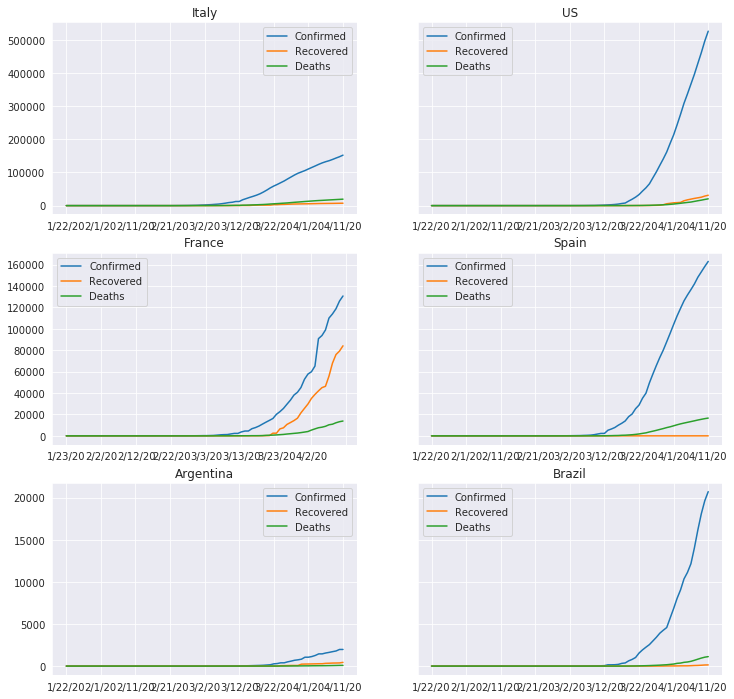

In [36]:
fig, axes = plt.subplots(figsize=(12,12), nrows=3, ncols=2, sharey='row')

for num, country in enumerate(['Italy', 'US', 'France', 'Spain', 'Argentina', 'Brazil']):
    get_country_data(country).plot(ax=axes[num // 2, num % 2], title=country)

plt.show()

### Múltiplos gráficos em uma mesma figura

Podemos combinar os dados de vários países em uma mesma figura. Uma maneira é criar um *DataFrame* com todos os dados que queremos combinar. Uma outra maneira mais simples, combinando os dados de poucos países e aproveitando o que já fizemos, é a seguinte.

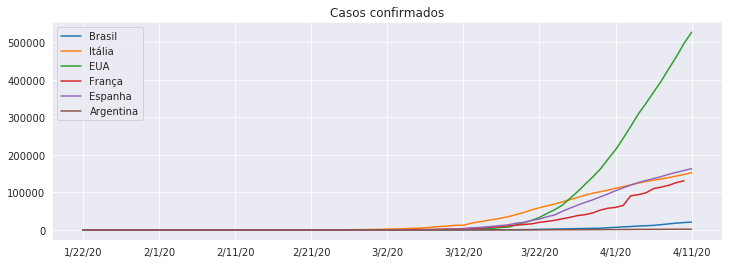

In [37]:
fig, ax = plt.subplots(figsize=(12,4))
get_country_data('Brazil')['Confirmed'].plot(ax=ax)
get_country_data('Italy')['Confirmed'].plot(ax=ax)
get_country_data('US')['Confirmed'].plot(ax=ax)
get_country_data('France')['Confirmed'].plot(ax=ax)
get_country_data('Spain')['Confirmed'].plot(ax=ax)
get_country_data('Argentina')['Confirmed'].plot(ax=ax)
plt.legend(['Brasil', 'Itália', 'EUA', 'França','Espanha', 'Argentina'])
plt.title('Casos confirmados')
plt.show()

Se quisermos combinar os vários tipos de casos, podemos fazer como a seguir.

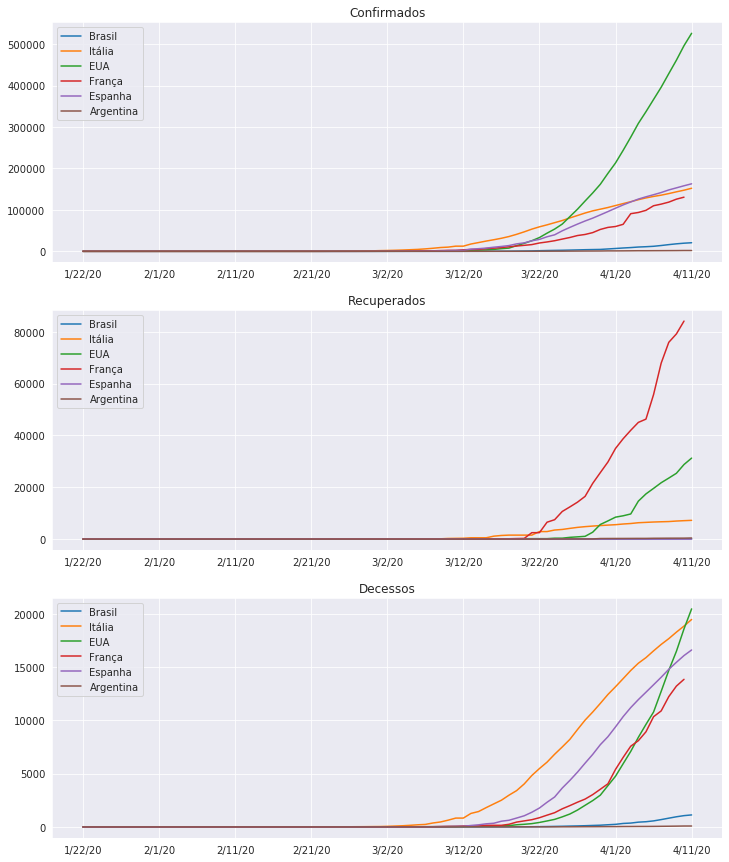

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,15), nrows=3, ncols=1)

get_country_data('Brazil')['Confirmed'].plot(ax=ax1, title='Confirmados')
get_country_data('Italy')['Confirmed'].plot(ax=ax1)
get_country_data('US')['Confirmed'].plot(ax=ax1)
get_country_data('France')['Confirmed'].plot(ax=ax1)
get_country_data('Spain')['Confirmed'].plot(ax=ax1)
get_country_data('Argentina')['Confirmed'].plot(ax=ax1)
ax1.legend(['Brasil', 'Itália', 'EUA', 'França','Espanha', 'Argentina'])

get_country_data('Brazil')['Recovered'].plot(ax=ax2, title='Recuperados')
get_country_data('Italy')['Recovered'].plot(ax=ax2)
get_country_data('US')['Recovered'].plot(ax=ax2)
get_country_data('France')['Recovered'].plot(ax=ax2)
get_country_data('Spain')['Recovered'].plot(ax=ax2)
get_country_data('Argentina')['Recovered'].plot(ax=ax2)
ax2.legend(['Brasil', 'Itália', 'EUA', 'França','Espanha', 'Argentina'])

get_country_data('Brazil')['Deaths'].plot(ax=ax3, title='Decessos')
get_country_data('Italy')['Deaths'].plot(ax=ax3)
get_country_data('US')['Deaths'].plot(ax=ax3)
get_country_data('France')['Deaths'].plot(ax=ax3)
get_country_data('Spain')['Deaths'].plot(ax=ax3)
get_country_data('Argentina')['Deaths'].plot(ax=ax3)
ax3.legend(['Brasil', 'Itália', 'EUA', 'França','Espanha', 'Argentina'])

plt.show()

## Crescimento exponencial

No início de uma epidemia, o crescimento do número de casos tem uma forma exponencial.

Digamos, por exemplo, que 

$$ q(t) = be^{at},
$$

onde $q$ é uma determinada quantidade (e.g. número de casos confirmados, ou recuperados ou decessos), $t$ é a variável temporal em uma determinada unidade de tempo (digamos, de um dia) e $a$ e $b$ são parâmetros relacionados à epidemia.

Ao determinarmos os parâmetros $a$ e $b$, podemos estimar o valor da quantidade $q$ em um tempo futuro e estimar como essa quantidade varia a cada unidade de tempo.

Observe que o parâmetro $a$ tem dimensão física inversa do tempo e que $b$ tem a mesma dimensão física da quantidade $q$. A dimensão de uma quantidade costuma ser denotada por um colchete. Assim, 

$$ [a] = \frac{1}{\mathrm{tempo}} = \frac{1}{T}, \qquad [b] = [q].
$$

A exponencial, o logaritmo e as funções trigonométricas são funções adimensionais (no domínio e no contradomínio).

Como $a$ tem dimensão inversa do tempo e $t$ tem dimensão de tempo, vemos que o produto $at$ que aparece na exponencial é adimensional, fazendo sentido.

### O que o parâmetro $a$ nos diz

A partir do parâmetro $a$, assumindo-o constante em um determinado intervalo de tempo, e sendo a solução da forma

$$ q(t) = be^{at},
$$

obtemos as sequintes informações:

1. A cada intervalo de tempo $\Delta t$, a quantidade aumenta para

$$ q(t+\Delta t) = be^{a(t+\Delta t)} = be^{a\Delta t}e^{at} = e^{a\Delta t}q(t)
$$

ou seja, ela aumenta pelo fator

$$ e^{a\Delta t} $$

2. Dito de outra forma, a quantidade aumenta em

$$ 100 (e^{a\Delta t} - 1) \,\%
$$

3. O **tempo de duplicação** é dado por $t_2$ tal que

$$ q(t+t_2) = be^{a(t+t_2)} = e^{at_2} q(t) = 2 q(t),
$$

ou seja,

$$ t_2 = \frac{1}{a}\ln 2.
$$

4. Se $e^{am\Delta t} = n$, com $n, m\in \mathbb{N}$, então

$$ q(t + m\Delta t) = e^{am\Delta t}q(t) = nq(t)
$$

então a quantidade é multiplicada por $n$ a cada intervalo de tempo $m\Delta t$.

5. Se $t_2$ duplica, então, obviamente, $3t_2/2$ triplica, $2t_2$ quadriplica, e assim por diante.

### Taxa de variação e taxa de variação específica

A **taxa de variação** dessa quantidade em relação ao tempo é

$$ \frac{\text{d} q}{\text{d} t} = a q
$$

Dividindo isso por $q$, temos a **taxa de variação específica**, que é exatamente o fator exponencial $a$:

$$ \frac{\frac{\text{d} q}{\text{d} t}}{q} = a
$$

**Obs:** Em termodinâmica, quantidades assim são chamadas *intensivas*, pois não dependem da quantidade total do "material", e.g. densidade, temperatura. Já $q' = aq$, que depende da quantidade total $q$, é o que em termodinâmica é chamado de quantidade *extensiva*, e.g. massa, volume e massa térmica.

### Aproximações

Ao determinarmos o parâmetro $a$, vemos que, a cada intervalo de tempo $\Delta t$, a quantidade $q$ apresenta uma variação da ordem de

$$ \Delta q \approx a q \Delta t
$$

e a quantidade atualizada fica da ordem de

$$  q + \Delta q \approx q + aq\Delta t = (1 + a \Delta t) q.
$$

Escrevendo $q_n = q(t_0+n\Delta t)$, $n\in \mathbb{N}$, vemos que

$$ q_{n+1} = (1+a\Delta t) q_n
$$

Temos, também

$$ \frac{q(t + 2\Delta t) - q(t + \Delta t)}{q(t + \Delta t) - q(t)} \approx \frac{a q(t+\Delta t) \Delta t}{a q(t) \Delta t} = \frac{q(t+\Delta t)}{q(t)} \approx \frac{(1 + a\Delta t) q(t)}{q(t)} = (1 + a\Delta t).
$$

Fazendo $(\Delta q)_n = q_{n+1} - q_n$, podemos escrever, mais geralmente,

$$ (\Delta q)_{n+1} \approx (1 + a\Delta t) (\Delta q)_n.
$$

De outra forma, temos

$$ \frac{(\Delta q)_{n+1}}{(\Delta q)_n} \approx (1 + a\Delta t).
$$

Ou seja, durante um crescimento exponencial, a variação a cada unidade de tempo também cresce exponencialmente:

$$ (\Delta q)_n \approx (1 + a\Delta t)^n (\Delta q)_0
$$

Quanto maior $a$, mais dramático o crescimento.

**Obs:** Fixando $t>0$ e escolhendo uma sequência $\delta_n = t/n$, vemos que 

$$ (1+a\delta_n)^n = \left(1 + \frac{a t}{n}\right)^n \rightarrow e^{at}, \quad n\rightarrow \infty.
$$

### Crescimento exponencial variável

Na prática, a taxa de crescimento exponencial varia com o tempo,

$$ \frac{\text{d} q}{\text{d} t} = a(t) q
$$

o que nos leva a

$$ q(t) = b e^{\int_0^t a(s) \text{d} s}.
$$

### Fases

Em relação à terminologia, uma **endemia** é quando o número de casos é essencialmente constante (ou pelo menos periódico, no caso de ser **sazonal**). Um exemplo é a gripe comum, conhecida mais tecnicamente como *influenza*.

Chamamos de **epidemia** quando o número de casos de uma determinada doença é crescente. Esse crescimento é tipicamente exponencial.

No início de uma epidemia, a taxa de crescimento $a(t)$ do número de casos começa pequena, mas é positiva e crescente. Nesse caso,

$$ (\Delta q)_{n+1} > (\Delta q)_n,
$$

e o número de casos **diários** (novos casos) também aumenta.

A taxa $a(t)$ continua crescendo até atingir um valor máximo, representando o crescimento mais rápido possível. Após esse ponto de inflexão, o número de casos continua crescendo, mas a uma taxa menor. Nessa fase, 

$$ (\Delta q)_{n+1} < (\Delta q)_n,
$$

e o número de casos **diários** (novos casos) diminui.

O pico da epidemia ocorre quando $a(t) = 0$. Após esse ponto, $a(t) < 0$ e o número de casos **totais** também começa a diminuir,

$$ \frac{\text{d} q}{\text{d} t} = a(t) q < 0.
$$

Deste ponto em diante, dizemos que chegamos ao fim da epidemia.

A tendência é que ela se estabilize para uma endemia, mas, em certos casos, pode haver novas ondas de epidemia.

### Aproximações

Localmente, ainda podemos escrever

1. $q(t+\Delta t) \approx (1 + a(t)\Delta t) q(t)$.

2. $\Delta q \approx a(t)q(t)\Delta t$.

3. Tempo de duplicação a partir de um instante $t$ é aproximadamente $\ln 2/a(t)$.

Escrevendo $a_n = a(t+n\Delta t)$, temos

1. $q_n \approx (1+a_n\Delta t)q_n$.

2. $(\Delta q)_n \approx a_nq_n\Delta t$.

3. $(t_2)_n \approx \ln/a_n$.

## Crescimento exponencial e gráficos em escala logarítmica

1. Quando uma função apresenta um crescimento exponencial, como $q=be^{at}$, é útil fazer um gráfico em escala logarítmica no eixo das ordenadas. Isso significa fazermos uma mudança de variáveis

$$ Q = \ln q,
$$

de forma que, $ Q = \ln q = \ln (be^{at}) = \ln b + \ln( e^{at}) = \ln b + at,$ ou seja,

$$ Q = B + at,
$$

onde $B=\ln b$. Ou seja, o gráfico se torna uma reta e a inclinação da reta nos diz o fator $a$ de crescimento exponencial.

2. Outra forma de verificar isso é plotando a taxa de variação $q'$ em função da quantidade $q$, já que

$$ q' = aq
$$

Nesse caso, temos retas que passam pela origem e não precisamos de um parâmetro análogo a $B$.

3. Além disso, usando escala logarítmica nos eixos de $q'$ e $q$, temos

$$ \ln q' = \ln a + \ln q
$$

Nesse caso, a inclinação é sempre $1$ e o parâmetro $a$ entra apenas para transladar a reta verticalmente.

**Obs:** Escalas logarítmicas nos dois eixos também são úteis em leis de potência $x = t^p$, com $p$ entrando como sendo a inclinação da reta obtida.

### Crescimento da epidemia do covid-19

Vamos visualizar o crescimento dos dados da epidemia do covid-19 e ver se conseguimos verificar se o crescimento é exponencial.

Para isso, vamos usar a escala logarítmica na ordenada, do número de casos confirmados, em relação ao tempo. 

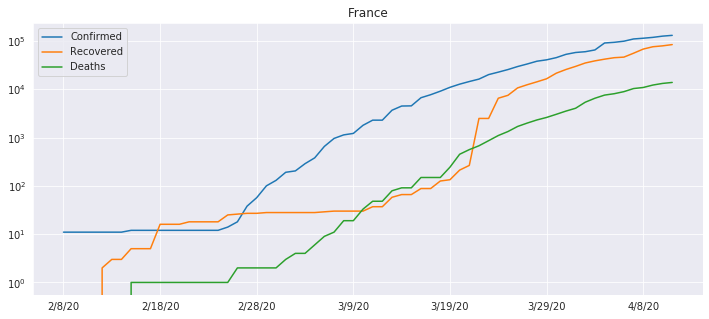

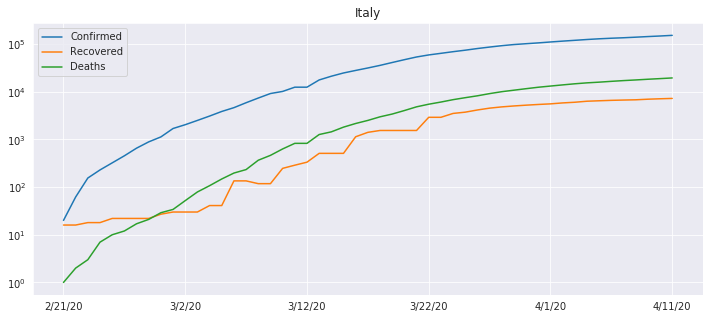

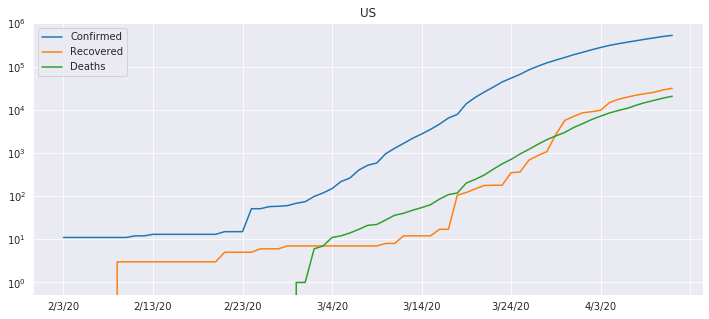

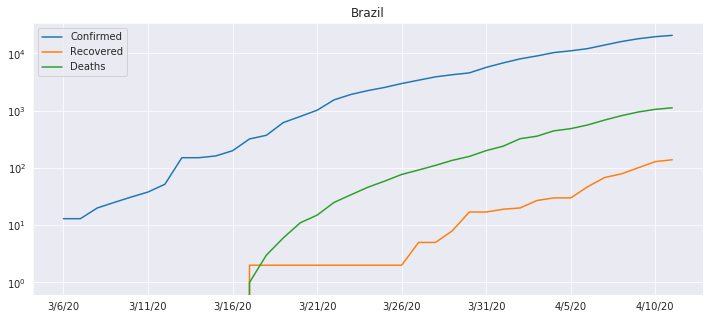

In [39]:
for country in ('France', 'Italy', 'US', 'Brazil'):
    get_country_data(country, False, 'Confirmed', 10).plot(figsize=(12,5),
                                                           logy=True,
                                                           title=country)
plt.show()

Ou em versão interativa, com o [plotly.express](https://plotly.com/python/plotly-express/). É um tanto irritante que os argumentos do `plotly` sejam um pouco diferentes do [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html) (e.g. `logy` vs `log_y`, `title`, etc.), mas paciência.

In [40]:
for country in ('France', 'Italy', 'US', 'Brazil'):
    wide_df = get_country_data(country, False, 'Confirmed', 10)
    tidy_df = pd.melt(wide_df.reset_index(), id_vars='index')
    tidy_df.rename(columns={'index':'Data', 'variable': 'Situação', 'value': 'Número de casos'},
                   inplace=True)
    fig = px.line(tidy_df, x="Data", y="Número de casos", color="Situação", log_y=True,
                  title = {'text': country, 'x':0.5, 'y':0.85, 'xanchor': 'center'}, 
                  width=800, height=400)
    fig.show()

### Crescimento no Brasil

No momento, vamos usar o "olhômetro" para encontrar parâmetros adequados. Posteriormente, vamos usar regressão linear para encontrar os parâmetros $a$ e $b$ que melhor se ajustam aos dados, em um determinado intervalo.

Para efeito de ilustração, usamos os dados de casos "Confirmados", e a partir do momento em que esse número chega a dez. Selecionamos esses dados através da função `get_country_data()`:

In [41]:
df_Brazil_confirmed_10 = get_country_data('Brazil', False, 'Confirmed', 10)['Confirmed']
df_Brazil_confirmed_10

3/6/20        13
3/7/20        13
3/8/20        20
3/9/20        25
3/10/20       31
3/11/20       38
3/12/20       52
3/13/20      151
3/14/20      151
3/15/20      162
3/16/20      200
3/17/20      321
3/18/20      372
3/19/20      621
3/20/20      793
3/21/20     1021
3/22/20     1546
3/23/20     1924
3/24/20     2247
3/25/20     2554
3/26/20     2985
3/27/20     3417
3/28/20     3904
3/29/20     4256
3/30/20     4579
3/31/20     5717
4/1/20      6836
4/2/20      8044
4/3/20      9056
4/4/20     10360
4/5/20     11130
4/6/20     12161
4/7/20     14034
4/8/20     16170
4/9/20     18092
4/10/20    19638
4/11/20    20727
Name: Confirmed, dtype: object

Este é um objeto `pandas` do tipo `Series`:

In [42]:
type(df_Brazil_confirmed_10)

pandas.core.series.Series

In [43]:
df_Brazil_confirmed_10.index

Index(['3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20'],
      dtype='object')

Escolhemos $b$ como sendo o primeiro valor dessa série,

$$ b = \mathtt{df}\_\mathtt{Brazil}\_\mathtt{confirmed}\_\mathtt{10[0]} = 13
$$

e escolhemos $a$ (por tentativa e erro) como sendo 

$$ a = 0.27
$$

Essa escolha de $a$ nos dá

$$ e^a \approx 1.29693
$$

Com ele, montamos a nossa aproximação exponencial

$$ be^{at}
$$

Fazemos isso construindo uma lista em python com esses valores diários e transformando essa lista em um objeto `Series` do `pandas`, usando o mesmo índice dos dados do Brasil.

Os índices são acessados pelo atributo `index`:

In [44]:
df_Brazil_confirmed_10.index

Index(['3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20'],
      dtype='object')

Assim, montamos a aproximação exponencial.

In [45]:
a = 0.27
b = df_Brazil_confirmed_10[0]
approx_data = [b*np.exp(a*j) for j in range(df_Brazil_confirmed_10.count())]
df_approx = pd.Series(approx_data, index = df_Brazil_confirmed_10.index)
df_approx

3/6/20         13.000000
3/7/20         17.029538
3/8/20         22.308089
3/9/20         29.222804
3/10/20        38.280834
3/11/20        50.146532
3/12/20        65.690174
3/13/20        86.051793
3/14/20       112.724790
3/15/20       147.665467
3/16/20       193.436512
3/17/20       253.394955
3/18/20       331.938383
3/19/20       434.827481
3/20/20       569.608543
3/21/20       746.166942
3/22/20       977.452168
3/23/20      1280.427592
3/24/20      1677.314627
3/25/20      2197.222535
3/26/20      2878.283411
3/27/20      3770.448947
3/28/20      4939.154084
3/29/20      6470.116267
3/30/20      8475.622302
3/31/20     11102.763913
4/1/20      14544.226031
4/2/20      19052.419064
4/3/20      24957.991674
4/4/20      32694.081854
4/5/20      42828.084979
4/6/20      56103.268815
4/7/20      73493.287718
4/8/20      96273.594278
4/9/20     126114.986048
4/10/20    165206.148428
4/11/20    216414.181483
dtype: float64

Agora, podemos montar o gráfico. Dessa vez, para ficar mais claro que os nosso dados são discretos (diários), plotamos os dados reais com pontos.

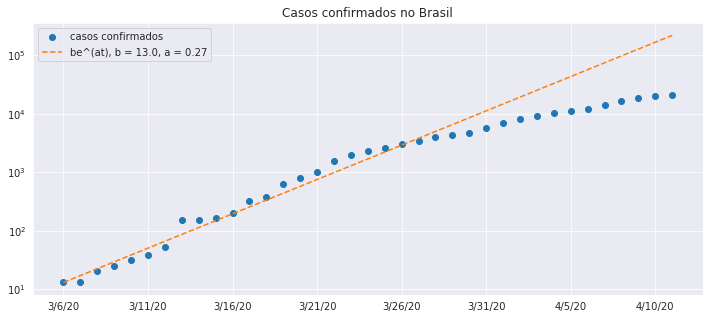

In [46]:
fig, ax = plt.subplots(figsize=(12,5))

df_Brazil_confirmed_10.plot(ax=ax, style='o', logy=True)
df_approx.plot(ax=ax, style='--')

plt.title('Casos confirmados no Brasil')
ax.legend(['casos confirmados', f'be^(at), b = {b:.1f}, a = {a:.2f}'])
plt.show()

Vemos, pelo gráfico, que $a=0.27$ é uma boa aproximação. Calculando

In [47]:
np.exp(a) - 1

0.3099644507332473


vemos que o número de casos diários aumenta em aproximadamente 31%.

Calculando

In [48]:
np.log(2)/a

2.567211779851649

vemos que o número de casos diários duplica aproximadamente a cada dois dias e meio.

Dito de outra forma, ele quadriplica a cada cinco dias.

Mas observe, no gráfico, que, na última semana, esse crescimento tem sido menor. Um ajuste apenas nesses últimos dados iria nos revelar um fator $a$ menor.

Mas não devemos nos ater a esses dados como sendo muito precisos. Há vários problemas práticos de falta de kits de testes, casos claros de infectados que não são testados, e atraso no resultado dos testes.

### Regressão linear

Vamos, agora, usar regressão linear para encontrar os parâmetros $a$ e $b$ que melhor se ajustam aos dados. Vamos trabalhar em cima dos dados de números confirmados no Brasil.

Regressão linear trata da busca de um modelo linear que melhor se ajusta a valores dados a~priori. Isso alcançado através do problema de mínimos quadrados.

#### Mínimos quadrados

Considere um problema linear da forma

$$ A\mathbf{u} = \mathbf{c}.
$$

Suponha que este não tem solução, mas que estamos interessados em achar a "melhor solução possível" $\mathbf{u}$, no sentido de diminuir a norma Euclidiana (ou distância) entre $A\mathbf{u}$ e $\mathbf{c}$, i.e.

$$ \min_{\mathbf{u}\in \mathbb{R}^2} \|A\mathbf{u} - \mathbf{c}\|_2,
$$

Isso é equivalente a minimizar o quadrado da distância, que é uma função contínua, coerciva e continuamente diferenciável, dada por

$$ f(\mathbf{u}) = \|A\mathbf{u} - \mathbf{c}\|_2^2 = \|A\mathbf{u}\|_2^2 - 2\langle A\mathbf{u},\mathbf{c}\rangle + \|\mathbf{c}\|_2^2.
$$

Os seus pontos de mínimo podem ser obtidos procurando-se os pontos críticos da função.

O gradiente dessa função é dado por

$$ \mathbf{\nabla} f(\mathbf{u}) = 2A^tA\mathbf{u} - A^t \mathbf{c},
$$

onde $A^t$ é a transposta da matriz $A$.

Assim, os seus pontos criticos são dados pelas soluções do sistema

$$ 2A^tA\mathbf{u} = A^t \mathbf{c}.
$$

Tipicamente, $A$ é uma matriz com várias linhas (correspondendo aos vários dados disponíveis) e poucas colunas (correspondendo aos poucos parâmetros que queremos usar para ajustar o modelo). Por isso é comum não termos solução para o problema inicial.

Por sua vez, $A^tA$ é uma matriz quadrada e esperamos encontrar solução, tipicamente uma única solução.

Este sistema pode até ser degenerado e nos dar uma infinidade de mínimos, mas pelo menos uma solução iremos encontrar. Além disso, a função $f$ não tem pontos de máximo, a menos que $A$ seja nula.


#### Aproximação linear

No caso de buscarmos uma aproximação da forma

$$ Q = B + at
$$

no plano $t \times Q$, com $Q = \ln q$, para os dados $(t_j,Q_j)$ no logaritmo $Q_j=\ln q_j$ do número $q_j$ de casos confirmados a cada dia $t_j$ no Brasil, queremos resolver aproximadamente o sistema

$$ \begin{cases}
     B + at_1 & = & Q_1, \\
     B + at_2 & = & Q_2, \\
     \;\;\;\vdots & \vdots & \vdots \\
     B + at_n & = & Q_n
   \end{cases}
$$ 

Em forma de sistema, isso significa resolver o problema linear com

$$ A = \left[ \begin{matrix} t_1 & 1 \\ \vdots  & 1 \\ t_n & 1 \end{matrix}\right], \qquad \mathbf{u} = \left( \begin{matrix} B \\ a \end{matrix}\right), \qquad \mathbf{c} = \left( \begin{matrix} Q_1 \\ \vdots \\ Q_n \end{matrix} \right).
$$

A matriz $A$ é uma matriz de Vandermonte, montada a partir dos instantes em que as medições são fornecidas. As incógnitas são os parâmetros de ajuste. E o lado direito são os (logaritmos) dos números de casos.

#### Resolvendo numericamente

Para resolver o problema de mínimos quadrados numericamente, vamos usar a função [np.linalg.lstsq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) do [numpy](https://numpy.org/).

Para isso, devemos montar a matriz $A$ e o vetor $\mathbf{c}$ acima.

Primeiro transformamos os dados de `df_Brazil_confirmed_10`, que é um objeto do tipo `Series`, em um `array` do `numpy`, usando o método [to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html), e calculamos o logaritmo dos seus coeficientes, para obter $\mathbf{c}$

In [49]:
c = np.log(df_Brazil_confirmed_10.to_numpy(dtype=int))
c

array([2.56494936, 2.56494936, 2.99573227, 3.21887582, 3.4339872 ,
       3.63758616, 3.95124372, 5.01727984, 5.01727984, 5.08759634,
       5.29831737, 5.77144112, 5.91889385, 6.43133108, 6.67582322,
       6.92853782, 7.34342623, 7.56216163, 7.71735127, 7.84541604,
       8.00135503, 8.13651825, 8.26975695, 8.35608503, 8.42923591,
       8.65119947, 8.82995804, 8.99268175, 9.1111828 , 9.24570752,
       9.31739944, 9.40598939, 9.54923824, 9.69091295, 9.80322513,
       9.88522174, 9.93919248])

Em seguida, criamos o vetor de tempos. Como os dados são diários, i.e. $t_j = j-1$, simplesmente.

In [50]:
t = np.array([j for j in range(len(c))])
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

Agora, montamos a matriz de Vandermonde. 

In [51]:
A = np.vstack([t,np.ones(len(t))]).T
A

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [27.,  1.],
       [28.,  1.],
       [29.,  1.],
       [30.,  1.],
       [31.,  1.],
       [32.,  1.],
       [33.,  1.],
       [34.,  1.],
       [35.,  1.],
       [36.,  1.]])

Finalmente, resolvemos via

In [52]:
a_r, B_r = np.linalg.lstsq(A, c, rcond=None)[0]
print(a_r, B_r)

0.21229768171669414 3.1677509092280287


In [53]:
b_r = np.exp(B_r)
print(a_r, b_r)

0.21229768171669414 23.75399933194204


Observe que isso ficou bem próximo do obtido "a olho".

Transformando em uma objeto do `pandas`, temos

In [54]:
regression_data = [b_r*np.exp(a_r*j) for j in range(df_Brazil_confirmed_10.count())]
df_regression = pd.Series(regression_data, index = df_Brazil_confirmed_10.index)
df_regression

3/6/20        23.753999
3/7/20        29.372198
3/8/20        36.319191
3/9/20        44.909258
3/10/20       55.531012
3/11/20       68.664980
3/12/20       84.905341
3/13/20      104.986806
3/14/20      129.817856
3/15/20      160.521846
3/16/20      198.487818
3/17/20      245.433346
3/18/20      303.482239
3/19/20      375.260620
3/20/20      464.015730
3/21/20      573.762837
3/22/20      709.466881
3/23/20      877.267092
3/24/20     1084.754725
3/25/20     1341.316485
3/26/20     1658.559185
3/27/20     2050.834834
3/28/20     2535.889918
3/29/20     3135.668251
3/30/20     3877.303708
3/31/20     4794.347756
4/1/20      5928.287319
4/2/20      7330.421639
4/3/20      9064.183046
4/4/20     11208.006624
4/5/20     13858.878605
4/6/20     17136.724007
4/7/20     21189.832025
4/8/20     26201.564609
4/9/20     32398.651728
4/10/20    40061.448599
4/11/20    49536.618911
dtype: float64

In [55]:
df_regression - df_approx

3/6/20         10.753999
3/7/20         12.342660
3/8/20         14.011102
3/9/20         15.686454
3/10/20        17.250178
3/11/20        18.518448
3/12/20        19.215167
3/13/20        18.935013
3/14/20        17.093067
3/15/20        12.856379
3/16/20         5.051305
3/17/20        -7.961609
3/18/20       -28.456143
3/19/20       -59.566861
3/20/20      -105.592812
3/21/20      -172.404105
3/22/20      -267.985286
3/23/20      -403.160500
3/24/20      -592.559903
3/25/20      -855.906050
3/26/20     -1219.724226
3/27/20     -1719.614113
3/28/20     -2403.264166
3/29/20     -3334.448015
3/30/20     -4598.318594
3/31/20     -6308.416157
4/1/20      -8615.938712
4/2/20     -11721.997425
4/3/20     -15893.808628
4/4/20     -21486.075231
4/5/20     -28969.206374
4/6/20     -38966.544808
4/7/20     -52303.455692
4/8/20     -70072.029668
4/9/20     -93716.334320
4/10/20   -125144.699828
4/11/20   -166877.562572
dtype: float64

Fazendo o gráfico, vemos

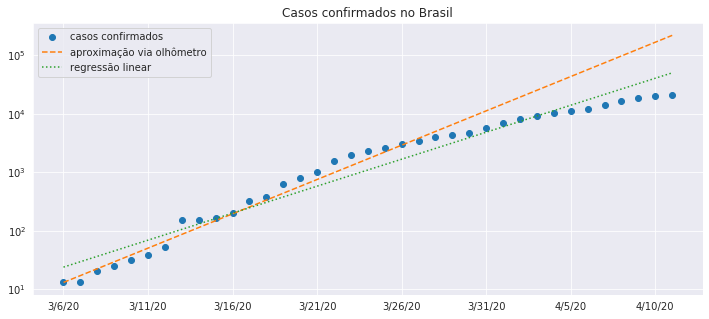

In [56]:
fig, ax = plt.subplots(figsize=(12,5))

df_Brazil_confirmed_10.plot(ax=ax, style='o', logy=True)
df_approx.plot(ax=ax, style='--')
df_regression.plot(ax=ax, style=':')

plt.title('Casos confirmados no Brasil')
ax.legend(['casos confirmados', 'aproximação via olhômetro', 'regressão linear'])
plt.show()

#### Erro quadrático e resíduos

O **erro quadrático**, ou **soma dos quadrados dos resíduos**, de um problema de mínimos quadrados é o valor de $\|A\mathbf{u} - \mathbf{c}\|_2^2$ para a melhor aproximação $\mathbf{u}$ encontrada, ou seja, é a soma do quadrado dos **resíduos**, que são os erros de cada medição,

$$ r_j = (A\mathbf{x})_j - y_j.
$$

Vamos comparar os erros quadráticos de cada aproximação:

In [57]:
SS_res_approx = np.linalg.norm(np.log(df_approx.to_numpy(dtype=int))
                                - np.log(df_Brazil_confirmed_10.to_numpy(dtype=int)))**2
SS_res_approx

30.188204353710624

In [58]:
SS_regression_res = np.linalg.norm(np.log(df_regression.to_numpy(dtype=int))
                                   - np.log(df_Brazil_confirmed_10.to_numpy(dtype=int)))**2
SS_regression_res

9.013322071861207

**Obs:** No caso da regressão, temos a opção de obter a soma dos quadrados dos resíduos `SS_res` diretamente da função [np.linalg.lstsq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)

#### Erro quadrático médio

Como o erro quadrático é a soma dos resíduos, ele tende a aumentar a medida em que adicionamos dados na amostras/medição, apesar da aproximação ficar potencialmente melhor. Por conta disso, é costume se considerar o erro quadrático médio, obtido dividindo-se o erro quadrático pelo número de amostras. 

Assim, dadas aproximações $\tilde Q_j$ para os valores $Q_j$ da amostra, independente delas terem sido obtidas via mínimos quadrados ou outra modelagem, temos que

- o **resíduo** de cada dado é a diferença 

$$ r_i = \tilde Q_i - Q_i
$$

entre o valor $\tilde Q_i$ do modelo e o valor $Q_i$ do dado, para cada abscissa $t_i$, das $N$ amostras $i=1, \ldots, N$.

- A **soma dos quadrado dos resíduos** é o total

$$ \mathrm{SS}_\mathrm{res} = \sum_i r_i^2.
$$

- O **erro quadrático médio** toma a média dos $r_i^2$:

$$ E = \frac{1}{N} \sum_i r_i^2 = \frac{\mathrm{SS}_\mathrm{res}}{N}.
$$

#### R quadrado

O erro quadrático e o erro quadrático médio, no entanto, são valores absolutos e, por si só, não são boas medidas de quão bom o modelo é.

Para isso, uma primeira medida da qualidade do método é o **R quadrado**, ou **coeficiente de determinação**, definido por

$$ R^2 = 1 - \frac{\mathrm{SS}_\mathrm{res}}{\mathrm{SS}_\mathrm{tot}},
$$

onde $\mathrm{SS}_\mathrm{tot}$ é a **variância** dos dados,

$$ \mathrm{SS}_\mathrm{tot} = \sum_i (Q_i - \bar Q)^2,
$$

e $\bar Q$ é a média dos valores:

$$ \bar Q = \frac{1}{N}\sum_i Q_i.
$$

Tipicamente, $R^2$ é um valor entre $0$ e $1$. E quanto mais perto de $1$, melhor a aproximação.

Uma interpretação para $R^2$ é a de indicar a fração dos dados que é bem "explicada", ou "corretamente prevista", pelo modelo.

Vamos calcular esse valor no nosso caso.

In [59]:
Q_medio = np.mean(np.log(df_Brazil_confirmed_10.to_numpy(dtype=int)))
SS_tot = np.linalg.norm(np.log(df_Brazil_confirmed_10.to_numpy(dtype=int)) - Q_medio)**2
R_sq = 1 - SS_regression_res/SS_tot
R_sq

0.9547588514963457

Por fim, é costume traçar o gráfico da modelagem exibindo o valor de R quadrado:

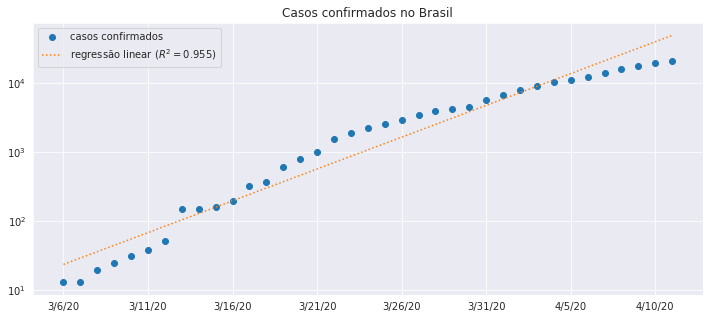

In [60]:
fig, ax = plt.subplots(figsize=(12,5))

df_Brazil_confirmed_10.plot(ax=ax, style='o', logy=True)
df_regression.plot(ax=ax, style=':')

plt.title('Casos confirmados no Brasil')
ax.legend(['casos confirmados', f'regressão linear ($R^2 = {R_sq:.3f}$)'])

plt.show()

#### Em coordenadas lineares

Observe, no entanto, que em coordenadas lineares (reais), a aproximação exponencial não é tão boa:

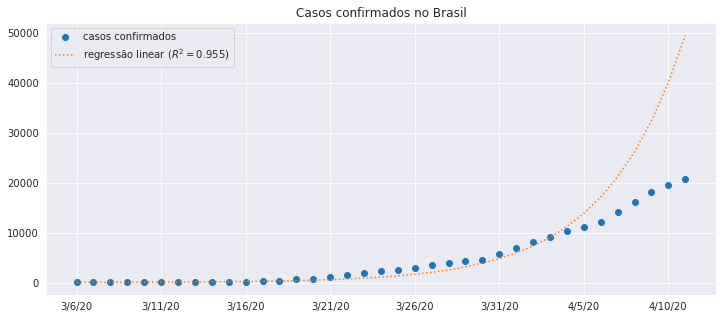

In [61]:
fig, ax = plt.subplots(figsize=(12,5))

df_Brazil_confirmed_10.plot(ax=ax, style='o')
df_regression.plot(ax=ax, style=':')

plt.title('Casos confirmados no Brasil')
ax.legend(['casos confirmados', f'regressão linear ($R^2 = {R_sq:.3f}$)'])

plt.show()

Isso pode se dar por uma série de motivos. 

- Primeiro que, na realidade, o parâmetro de crescimento específico $a=a(t)$ não é constante. O crescimento está mais próximo de um crescimento **logístico**.

- Segundo que o número de casos confirmados não corresponde ao número de casos de infectados.

- Terceiro que essa diferença tende a aumentar a medida em que o número de casos aumenta e isso pressiona o sistema de saúde a reduzir, proporcionalmente, o número de testes e a aumentar o tempo até se obter o resultado. (O meu, por exemplo, demorou 15 dias, quando normalmente deveria durar entre dois e três dias).

- Quarto que, em escala logarítmica, o error para valores grandes da quantidade é reduzido, diminuindo, relativamente, o peso deles no ajuste.

## Exercícios

1. Faça um gráfico do número de casos da China, usando a função `get_country_data()`. Determine o que há de errado no gráfico e implemente uma solução.

1. Modifique a função `get_country_data`, em relação aos argumentos `case` e `threshold`, para selecionar os dados a partir do primeiro índice em que o valor mínimo do caso selecionado é alcançado, para evitar que erros nos dados façam algumas datas futuras serem descartadas, causando um "buraco" na série de dados.

1. Modifique a função `get_country_data()` para incluir um novo argumento denominado `local` que selecione a Província/Estado (`Province/State`) do país. Faça esse argumento *default* para a string nula "" e a busca pela Província/Estado só ter efeito caso este argumento não seja "". Exemplifique isso com algumas províncias do Canadá.

1. Modifique a função `get_country_data` incluindo um argumento denominado `transcorridos` para que as datas sejam substituídas por dias transcorridos desde a data inicial, portanto começando com dia 0 e continuando com 1, 2, 3, etc. Faça esse argumento ter `False` como valor *default* e que a substituição ocorra apenas se ela for `True`.

1. Usando a modificação acima, faça um gráfico conjunto dos casos confirmados de vários países (a sua escolha, pelo menos dez), onde a abscissa é o número de dias transcorridos desde que o número de casos ficou maior ou igual a dez.

1. Repita o gráfico anterior, mas em escala logarítmica no eixo das ordenadas.

1. Sejam $\Delta t = 1\,\textrm{dia}$, $t_0$ o primeiro dia em que o número de casos confirmados é pelo menos 10, $q_n = q(t_0 + n\Delta t)$ o número de casos confirmados a cada $n$-ésimo dia após $t_0$, e $\Delta q_n = q_{n+1} - q_n$, $n\in \mathbb{N}$. Faça o gráfico de $\Delta q_n$ por $q_n$ (ou por $q_{n+1}$, se preferir), tanto em escala linear (em ambas as variáveis) como em escala logarítmica (em ambas as variáveis), para pelo menos dez países a sua escolha. De preferência que tenham características diferentes. Faça comentários.

1. Considere a equação $q'(t) = a(t) q(t)$ no caso em que $a=a(t)$ é variável.
  
    a. Ache uma aproximação para a relação $(\Delta q)_{n+1}/(\Delta q)_n$ envolvendo apenas $a_n$, $a_{n+1}$ e $\Delta t$, onde $a_n = a(n\Delta t)$ e $a_n'= a'(n\Delta t)$. 

    b. Em seguida, usando a equação $q' = a q$, escreva a segunda derivada $q''$ em função de $a'$, $a$ e $q$.
    
    c. Compare a condição $(\Delta q)_{n+1}/(\Delta q)_n < 1$ com a condição $q''< 0$. Comente.

## Material Complementar

- [How to Use Kaggle](https://www.kaggle.com/docs/notebooks)

- [Kaggle micro-course: Python](https://www.kaggle.com/learn/python)

- [Kaggle micro-course: Pandas](https://www.kaggle.com/learn/pandas)

- [Kaggle micro-course: Data Visualization](https://www.kaggle.com/learn/data-visualization)

- [Python For Data Science Cheat Sheet: Pandas Basics](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)

## Observações

Vale, em um segundo momento, verificar a base [Coronavirus 2019-nCoV](https://www.kaggle.com/gpreda/coronavirus-2019ncov), que "conserta" (linhas diferentes relacionadas ao mesmo país, com nomes escritos de maneira diferentes) e completa (latitude e longitude) alguns dados de um dos arquivos da base acima, a saber `csse_covid_19_daily_reports.csv`.

<!--NAVIGATOR-->

---
[<- Página Inicial](00.00-Pagina_Inicial.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Qualidade e comparação de modelos ->](05.00.Aula-Qualidade_e_comparacao_de_modelos.ipynb)